In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

# PREDICT/TARGET COLUMN IS 
Dependent Variable (Target Variable):

- Loan_Status

LOOKING AT THE DATA SET 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


It shows top 5 rows of the data set

In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


It shows bottom 5 rows of the data set

Independent Variables:

- Loan_ID:        Unique Loan ID

- Gender:         Male or Female

- Married:        Yes (or) No

- Dependents:      No.of Dependents

- Education:       Graduate or Not

- Self_Employed:    Either he/she Self Employed or not

- ApplicantIncome:   Income of the Applicant

- CoapplicantIncome:  Income of the Applicant

- Loan_Amount:         Loan Amount in dollars or rupees

- Loan_Amount_Term:     Term of loan in months

- Credit History:       credit history meets guidelines yes or no

- Property_Area:         Urban/ Semi Urban/ Rural

- Loan_Status:            Whether loan approved or not

# EXTRAPOLATORY DATA ANALYSIS (EDA) PART

In [5]:
df.shape

(614, 13)

It gives shape of data as 614 rows & 13 columns.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

From above there are very large amount object/categorical columns are present in the given data.

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

List of columns which are present in the data set.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


So by this there are some Null/NaN values are present in the given data set.

In [9]:
# Now lets check using isnull() function
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here there are some missiong values were present in the given data set.

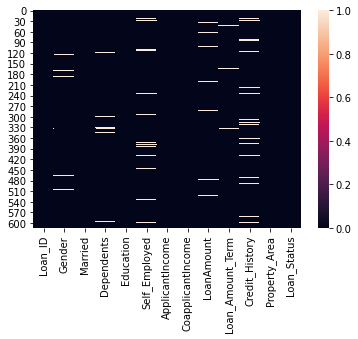

In [10]:
#let's visuvalize with heatmap also for better understanding.
sns.heatmap(df.isnull())
plt.show()

By above observed that in columns (Gender,Dependents,self-employed,LoanAmount,credit_History,Property_Area) Null values are present.

In [11]:
#checking unique values for each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Finding percentages for Null values 

In [13]:
for col in df:
    percentage = np.round((df[col].isnull().sum()/614)*100,1)
    print(col,':' , percentage,'%')

Loan_ID : 0.0 %
Gender : 2.1 %
Married : 0.5 %
Dependents : 2.4 %
Education : 0.0 %
Self_Employed : 5.2 %
ApplicantIncome : 0.0 %
CoapplicantIncome : 0.0 %
LoanAmount : 3.6 %
Loan_Amount_Term : 2.3 %
Credit_History : 8.1 %
Property_Area : 0.0 %
Loan_Status : 0.0 %


From above i found in Columns: Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History are having some missing data.

In [14]:
df['Loan_ID'].value_counts()

LP001034    1
LP002821    1
LP001768    1
LP001572    1
LP001996    1
           ..
LP001041    1
LP002912    1
LP001529    1
LP002435    1
LP001421    1
Name: Loan_ID, Length: 614, dtype: int64

This loan_data has unique values and this will not impact on Target column so i can drop it after some time.

# GENDER

In [15]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

for this Gender column Male persons are in huge amount. so fill nullvalues with male

In [17]:
df['Gender']=df['Gender'].fillna('Male')

In [18]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

# MARRIED

In [19]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

here in this column majority of people are married with yes. so replace it wit yes

In [21]:
df['Married']=df['Married'].fillna('Yes')

In [22]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

# DEPENDENTS

In [23]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Here majority ofpeople with 0 so replace with 0

In [24]:
df['Dependents']=df['Dependents'].fillna(0)

In [25]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

# Self Employed

In [26]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Here majority of self employed are with No so replace with No.

In [27]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [28]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

# LoanAmount

In [29]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

Here i replace Null values with Mean

In [31]:
df.LoanAmount=df['LoanAmount'].fillna((df.LoanAmount.mean()))

In [32]:
df['LoanAmount'].isnull().sum()

0

# Credit_History

In [33]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Here majority has 1 credit history . so replace with 1

In [34]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [35]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

# Loan_Amount_Term

In [36]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

here also majority of data has 360 values. So replace with 360

In [37]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360)

In [38]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [39]:
df['Loan_Amount_Term'].isnull().sum()

0

Therefore there are No null values were present

In [40]:
#Now lets check full data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


So sucessfully removed the null values from this data set

In [41]:
# let's checkthrough isnull().sum()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

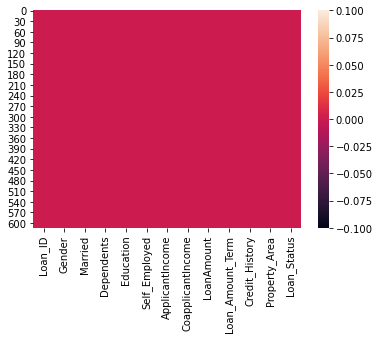

In [42]:
#let's again through heatmap()
sns.heatmap(df.isnull())
plt.show()

Through heatmap() it was found that there are no null values are present.

# Data Preprocessing

Finding features which are of integer datatype.

In [43]:
int_type = [feature for feature in df.columns if df[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in adf is :" , len(int_type))

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Number of columns with integer data type in adf is : 5


Finding datas which are of Object datatype.

In [44]:
object_type = [feature for feature in df.columns if df[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Number of columns with object data type in adf is : 8


# CHAGING CATEGORICAL VALUES TO MEANINGFUL ONE

# LABLE ENCODER

We are using Label_Encoder to encode our categorical features.

LabelEncoder converts categorical features to a meaningful number.

In [50]:
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int64

In [51]:
le = LabelEncoder()
df['Married']=le.fit_transform(df['Married'])
df['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

In [53]:
le = LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Education']

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 614, dtype: int32

In [54]:
le = LabelEncoder()
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int32

In [55]:
le = LabelEncoder()
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int32

In [56]:
le = LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [57]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


So Sucessfully converted catergorical data to numerical one using lable encoder

As i said above now we can drop 'Loan_ID' column as it is not much related with data.

In [58]:
df=df.drop('Loan_ID', axis=1)

In [59]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Finding Statstical Information about This Data set

In [54]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


from above data lets check outliers for columns :     

   ApplicantIncome,
   CoapplicantIncome,
    LoanAmount,
    Loan_Amount_Term,
    Credit_History    

<AxesSubplot:>

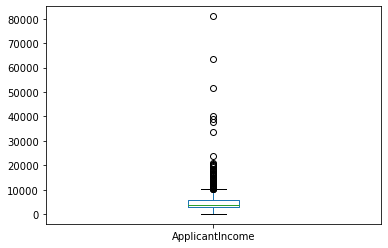

In [63]:
# Outliers can be visuliaze through Boxplot()
df['ApplicantIncome'].plot.box()

<AxesSubplot:>

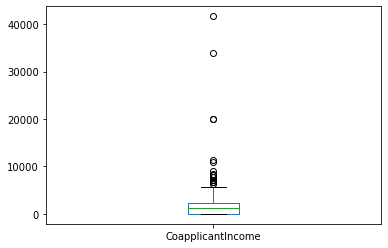

In [64]:
df['CoapplicantIncome'].plot.box()

<AxesSubplot:>

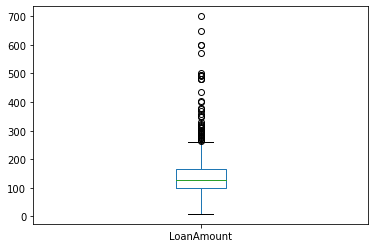

In [65]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

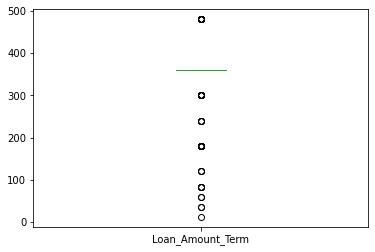

In [66]:
df['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

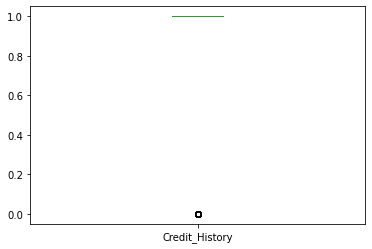

In [67]:
df['Credit_History'].plot.box()

By observing this its clear that allmost all coloumns are having outliers.

# OUTLIERS TREATMENT

These outliers are treated with help of z-score 

In [75]:
columns = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [76]:
z_score = np.abs(zscore(columns))

In [77]:
z_score

array([[0.07299082, 0.55448733, 0.        , 0.2732313 , 0.41173269],
       [0.13441195, 0.03873155, 0.21927331, 0.2732313 , 0.41173269],
       [0.39374734, 0.55448733, 0.957641  , 0.2732313 , 0.41173269],
       ...,
       [0.43717437, 0.47240418, 1.26937121, 0.2732313 , 0.41173269],
       [0.35706382, 0.55448733, 0.4833669 , 0.2732313 , 0.41173269],
       [0.13441195, 0.55448733, 0.15972753, 0.2732313 , 2.42876026]])

In [78]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


This shows values greater than 3 

In [79]:
df.shape

(614, 12)

Now outliers should be removed from our data

In [80]:
df1=df.drop([9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604])

In [81]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [82]:
df1.shape

(577, 12)

Now ouliers are sucessfully removed from the data set.

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int64  
 1   Married            577 non-null    int64  
 2   Dependents         577 non-null    object 
 3   Education          577 non-null    int32  
 4   Self_Employed      577 non-null    int32  
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int32  
 11  Loan_Status        577 non-null    int32  
dtypes: float64(4), int32(4), int64(3), object(1)
memory usage: 49.6+ KB


BY this sucessfully removed Outliers & Null/Missing data
and also all object data coverted to int data type also.

# CHECKING CORRELATION FOR THIS DATA 

In [84]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.076120,0.001963,1.000000,0.032112


<AxesSubplot:>

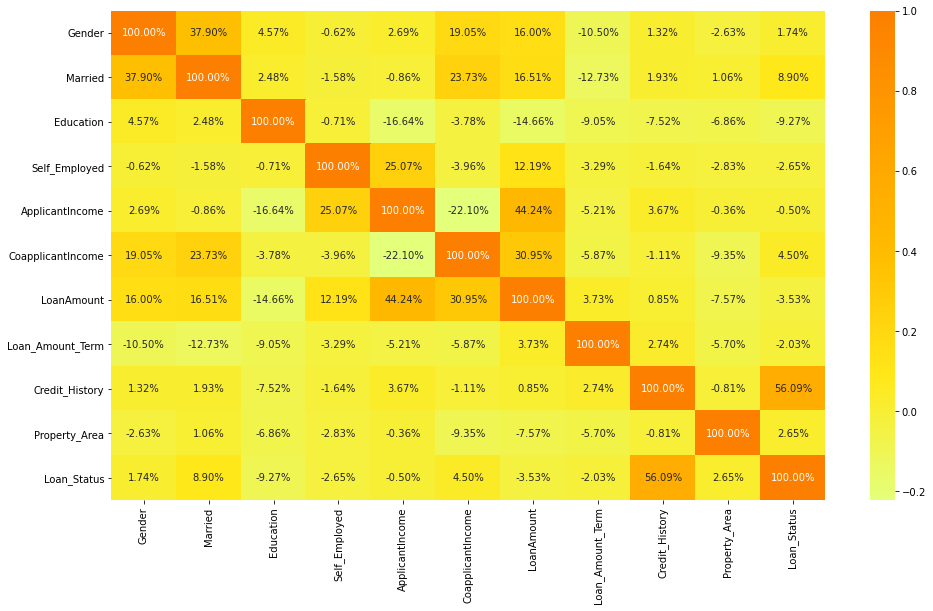

In [95]:
# checking correlation with heatmap()
plt.figure(figsize= (16,9))
sns.heatmap(df1.corr() , annot = True , fmt = '.2%' , cmap = 'Wistia')

In [96]:
corr_df = df1.corr()
corr_df  = corr_df.iloc[: , -1 :]
corr_df

,Loan_Status
Gender,0.017408
Married,0.089026
Education,-0.092658
Self_Employed,-0.026525
ApplicantIncome,-0.005003
CoapplicantIncome,0.045009
LoanAmount,-0.035289
Loan_Amount_Term,-0.020291
Credit_History,0.560936
Property_Area,0.026507


By this there is not much correlation exists between the variables for predictor column. So no requirment of PCA.

# FINDING SKWENESS

In [60]:
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Skewness presents for columns 

1) Gender

2) Education

3) Self_Employed

4) ApplicantIncome

5) CoapplicantIncome

6) LoanAmount

7) Loan_Amount_Term

8) Credit_History

In [98]:
df['Gender'].skew()

-1.6487952886687591

<AxesSubplot:ylabel='Frequency'>

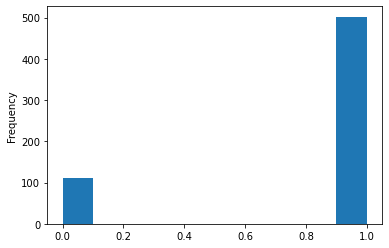

In [101]:
df['Gender'].plot.hist()

This is -ve skew as tail is on left side.

<AxesSubplot:ylabel='Frequency'>

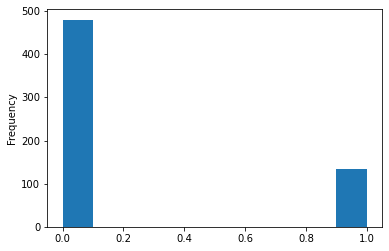

In [102]:
df['Education'].plot.hist()

This +ve skew as tail is on right side

<AxesSubplot:ylabel='Frequency'>

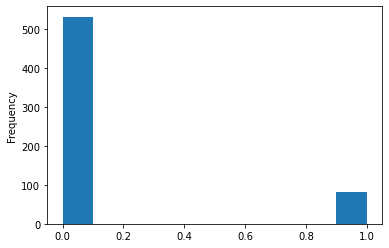

In [103]:
df['Self_Employed'].plot.hist()

This +ve skew as tail is on right side

<AxesSubplot:ylabel='Frequency'>

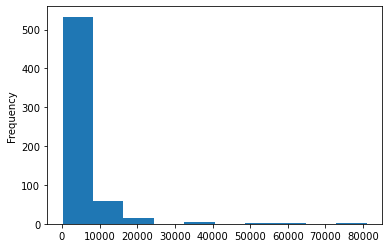

In [104]:
df['ApplicantIncome'].plot.hist()

This +ve skew as tail is on right side

<AxesSubplot:ylabel='Frequency'>

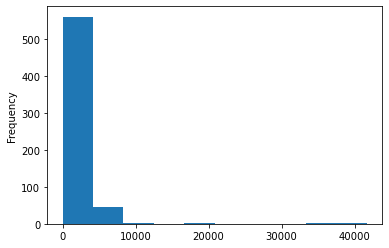

In [105]:
df['CoapplicantIncome'].plot.hist()

This +ve skew as tail is on right side

<AxesSubplot:ylabel='Frequency'>

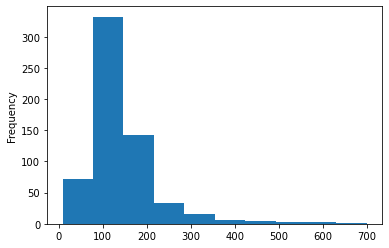

In [106]:
df['LoanAmount'].plot.hist()

This +ve skew as tail is on right side

<AxesSubplot:ylabel='Frequency'>

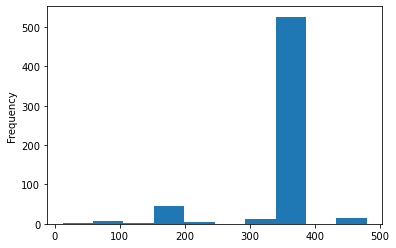

In [107]:
df['Loan_Amount_Term'].plot.hist()

This -ve skew as tail is on left side

<AxesSubplot:ylabel='Frequency'>

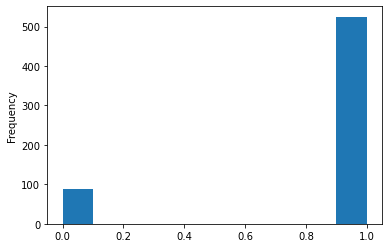

In [108]:
df['Credit_History'].plot.hist()

This -ve skew as tail is on left side

# Skweness removed by log transformation

In [121]:
skew_removal=np.log(df['Gender'])
skew_removal.skew()

0

In [122]:
skew_removal=np.log(df['Education'])
skew_removal.skew()

0

In [123]:
skew_removal=np.log(df['Self_Employed'])
skew_removal.skew()

0

In [124]:
skew_removal=np.log(df['ApplicantIncome'])
skew_removal.skew()

-0.9500442140177718

In [126]:
skew_removal=np.log(df['CoapplicantIncome'])
skew_removal.skew()

-1.9377252264222602

In [127]:
skew_removal=np.log(df['LoanAmount'])
skew_removal.skew()

-0.794774690828928

In [155]:
skew_removal=np.log(df['Loan_Amount_Term'])
skew_removal.skew()

5.768848659783631

In [129]:
skew_removal=np.log(df['Credit_History'])
skew_removal.skew()

0

In [157]:
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [137]:
x_predictor = df1.drop('Loan_Status', axis = 1)
x_predictor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [138]:
x_predictor.skew()

Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

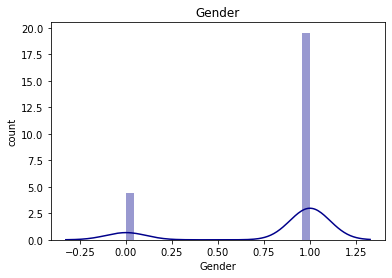

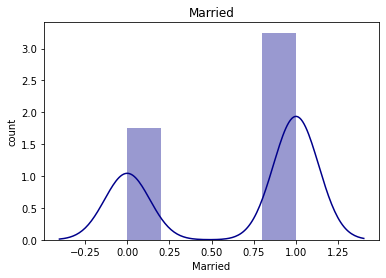

ValueError: could not convert string to float: '3+'

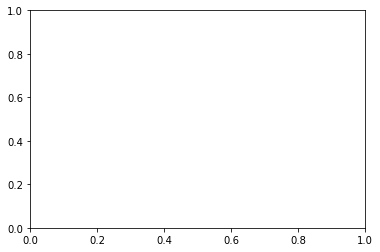

In [139]:
for feature in x_predictor :
    sns.distplot(x_predictor[feature] , kde = True , color = 'darkblue' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [140]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x_predictor)

ValueError: could not convert string to float: '3+'

In [142]:
x_trans = pd.DataFrame(x_t , columns = x_predictor.columns)
x_trans

NameError: name 'x_t' is not defined

In [141]:
for i in x_trans :
    print(i , max(x_trans[i]) - min(x_trans[i]))

NameError: name 'x_trans' is not defined

In [144]:
y = df1.iloc[: , -1 :]

In [145]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

NameError: name 'x_trans' is not defined

# Machine Learning Models

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

NameError: name 'x_sc' is not defined

In [150]:
models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(x_train , y_train)
    y_predicted = model.predict(x_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

NameError: name 'x_train' is not defined

In [153]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

NameError: name 'x_sc' is not defined

In [152]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

NameError: name 'random_forest' is not defined

In [151]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

NameError: name 'y_train' is not defined